In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\Renewable_Energy_Usage_Sampled.csv')
df.head()

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


Columns representation:  

1. **Household_ID** – A unique identifier for each household.  
2. **Region** – The broader geographical area where the household is located (e.g., North America).  
3. **Country** – The specific country of the household (e.g., USA).  
4. **Energy_Source** – The primary type of energy used (e.g., Hydro, Solar, Wind, etc.).  
5. **Monthly_Usage_kWh** – The household’s electricity consumption in kilowatt-hours (kWh) per month.  
6. **Year** – The current year of recorded data.  
7. **Household_Size** – The number of people living in the household.  
8. **Income_Level** – The household's income category (e.g., Low, Medium, High).  
9. **Urban_Rural** – Indicates whether the household is in an urban or rural area.  
10. **Adoption_Year** – The year the household adopted a renewable energy source (if applicable).  
11. **Subsidy_Received** – Whether the household received financial support for energy adoption (Yes/No).  
12. **Cost_Savings_USD** – The amount of money saved in USD due to using a particular energy source.  


In [3]:
print("Shape of data: ", df.shape)
df.info()

Shape of data:  (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB


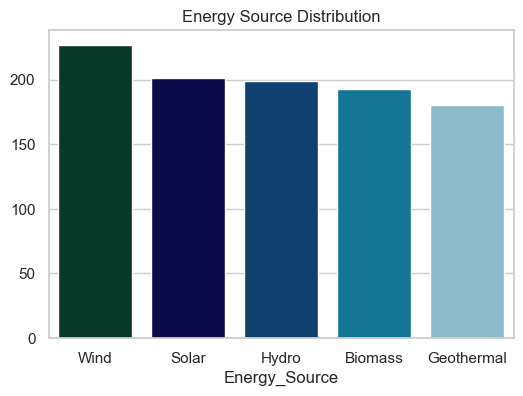

In [36]:
plt.figure(figsize=(6,4))
energy_dist = df['Energy_Source'].value_counts()
sns.barplot(x=energy_dist.index, y = energy_dist.values, palette="ocean")
plt.title("Energy Source Distribution")
plt.show()

<Figure size 400x200 with 0 Axes>

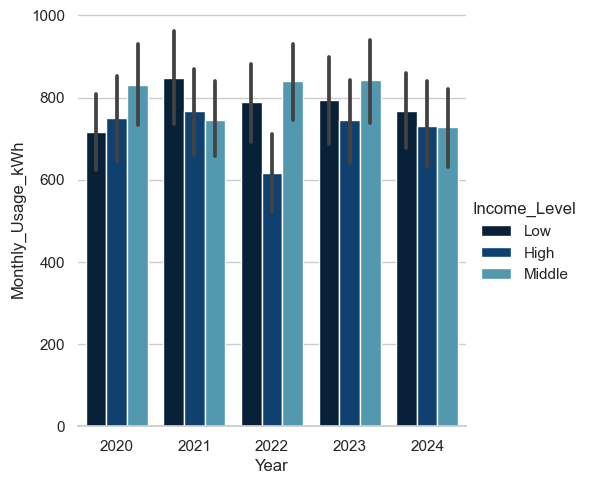

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,2))
g = sns.catplot(data=df, kind='bar', x='Year', y='Monthly_Usage_kWh', hue='Income_Level', palette='ocean')
g.despine(left=True)
plt.show()

To prove that there is no significant change in **monthly usage** across different **income levels (Low/Medium/High)** for each **year**, we can perform **ANOVA (Analysis of Variance)** or **Kruskal-Wallis Test**, depending on data distribution.

#### **Define Hypotheses**
- **Null Hypothesis (H₀):** Monthly usage **does not** significantly vary between income levels.
- **Alternative Hypothesis (H₁):** Monthly usage **does** significantly vary between income levels.


In [6]:
import scipy.stats as stats
results = {}
for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    groups = [yearly_data[yearly_data['Income_Level'] == level]["Monthly_Usage_kWh"] for level in yearly_data["Income_Level"].unique()]
    
    normality = [stats.shapiro(group)[1] for group in groups if len(group) > 3]
    is_normal = all(pval > 0.05 for pval in normality)
    
    if is_normal:
        stat, p_value = stats.f_oneway(*groups)  # ANOVA Test
        test_name = "ANOVA"
    else:
        stat, p_value = stats.kruskal(*groups)  # Kruskal-Wallis Test
        test_name = "Kruskal-Wallis"
    
    results[year] = {"Test": test_name, "p-value": p_value}        
    
    
for year, res in results.items():
    print(f"Year: {year}, Test: {res['Test']}, p-value: {res['p-value']:.4f}")

Year: 2024, Test: Kruskal-Wallis, p-value: 0.8408
Year: 2022, Test: Kruskal-Wallis, p-value: 0.0026
Year: 2020, Test: Kruskal-Wallis, p-value: 0.2860
Year: 2021, Test: Kruskal-Wallis, p-value: 0.3753
Year: 2023, Test: Kruskal-Wallis, p-value: 0.3569


1. **Year 2022 (p-value = 0.0026)**  
   - **Reject H₀** (p-value < 0.05)  
   - This means **monthly usage significantly varies** between income levels in 2022.

2. **Years 2020, 2021, 2023, 2024 (p-value > 0.05)**  
   - **Fail to reject H₀** (p-value > 0.05)  
   - No significant difference in **monthly usage across income levels** for these years.  
   - Confirms what the **catplot** suggested—monthly usage does not change much based on income.

### **Conclusion:**
- **For most years (2020, 2021, 2023, 2024)**, income levels do **not** impact monthly energy usage significantly.  
- **Only in 2022**, there was a statistically significant difference in usage across income levels.  This happened due to covid 19 pandemic

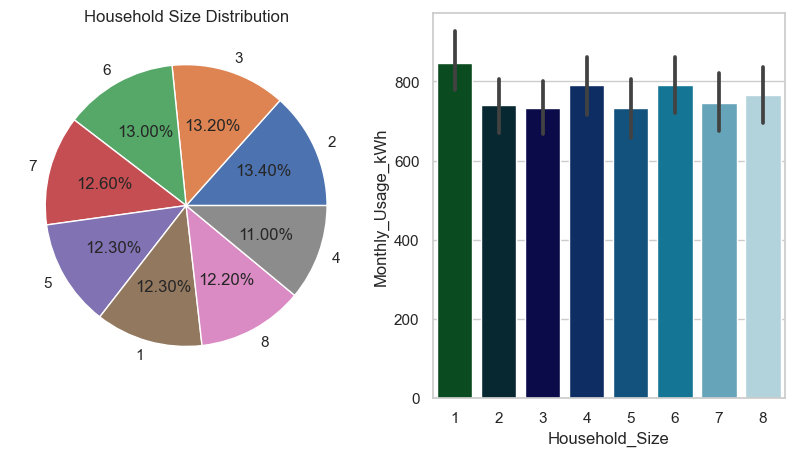

In [7]:
plt.figure(figsize=(10,5))
household_size_dist = df['Household_Size'].value_counts()
plt.subplot(1,2,1)
plt.pie(x=household_size_dist, autopct="%.2f%%", labels=household_size_dist.index)
plt.title("Household Size Distribution")

plt.subplot(1,2,2)
sns.barplot(data=df, x='Household_Size', y='Monthly_Usage_kWh', palette="ocean")

plt.show()

In [8]:
pt = pd.pivot_table(data=df, columns='Subsidy_Received', index='Country', values = 'Monthly_Usage_kWh',aggfunc='mean')
pt

Subsidy_Received,No,Yes
Country,,
Argentina,713.056667,811.398667
Australia,760.050976,828.672093
Brazil,950.020000,726.898500
Canada,761.645250,683.868500
Chile,480.272000,602.398182
China,754.079375,960.022727
Colombia,994.701250,864.372308
Egypt,898.119286,838.185909
France,859.789444,868.085556


# Energy Consumption Patterns

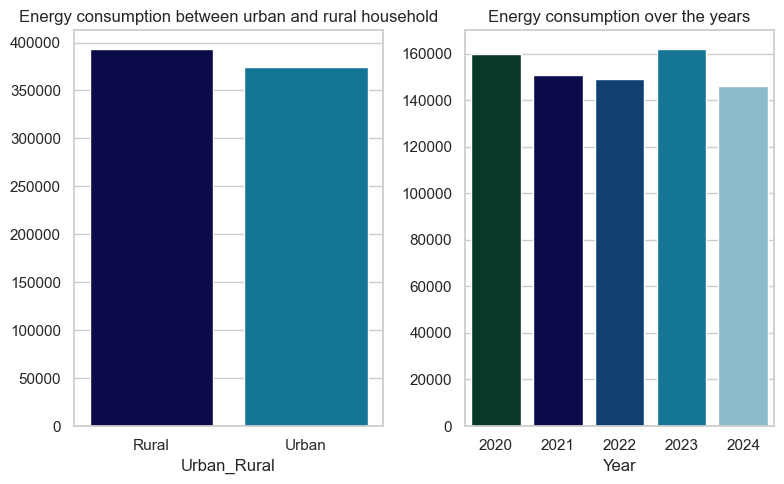

In [9]:
energy_consumption_urban_rural = df.groupby('Urban_Rural')['Monthly_Usage_kWh'].sum()
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(x=energy_consumption_urban_rural.index, y=energy_consumption_urban_rural.values,palette='ocean')
plt.title("Energy consumption between urban and rural household")

plt.subplot(1,2,2)
energy_consumption_overyears = df.groupby('Year')['Monthly_Usage_kWh'].sum()
sns.barplot(x=energy_consumption_overyears.index, y=energy_consumption_overyears.values,palette='ocean')
plt.title("Energy consumption over the years")

plt.tight_layout()
plt.show()

# Policy & Financial Impact

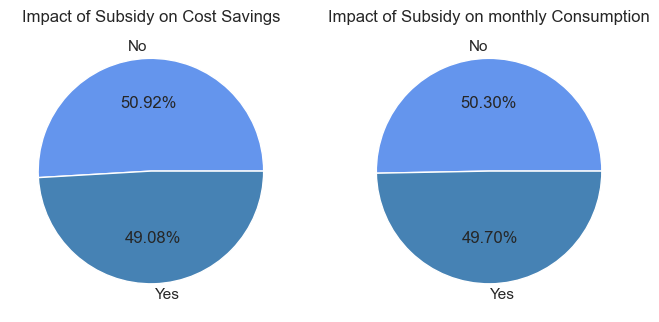

In [39]:
subsidy_cost_saving = df.groupby('Subsidy_Received')['Cost_Savings_USD'].sum()
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.pie(x=subsidy_cost_saving.values, autopct="%.2f%%", labels=subsidy_cost_saving.index, colors=['cornflowerblue', 'steelblue'])
plt.title("Impact of Subsidy on Cost Savings")

subsidy_consumption = df.groupby('Subsidy_Received')['Monthly_Usage_kWh'].sum()
plt.subplot(1,2,2)
plt.pie(x=subsidy_consumption.values, autopct="%.2f%%", labels=subsidy_consumption.index, colors=['cornflowerblue', 'steelblue'])
plt.title("Impact of Subsidy on monthly Consumption")
plt.show()

# Demographic Insights

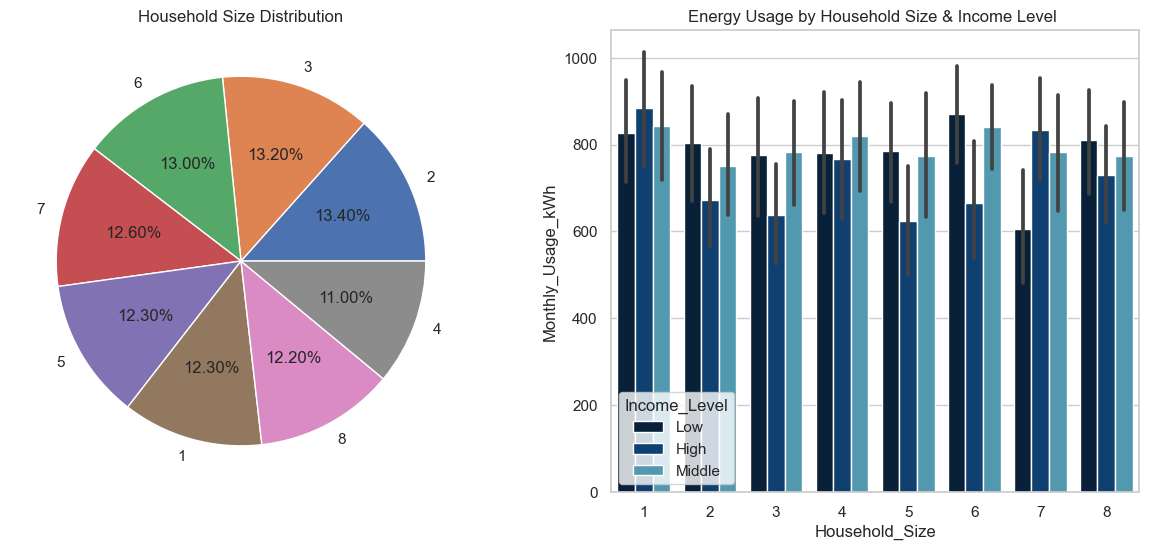

In [12]:
plt.figure(figsize=(15,6))
household_size_dist = df['Household_Size'].value_counts()
plt.subplot(1,2,1)
plt.pie(x=household_size_dist, autopct="%.2f%%", labels=household_size_dist.index)
plt.title("Household Size Distribution")

plt.subplot(1,2,2)
sns.barplot(data=df, x='Household_Size', y='Monthly_Usage_kWh',hue='Income_Level', palette="ocean")
plt.title("Energy Usage by Household Size & Income Level ")
plt.show()

# Comparative Analysis

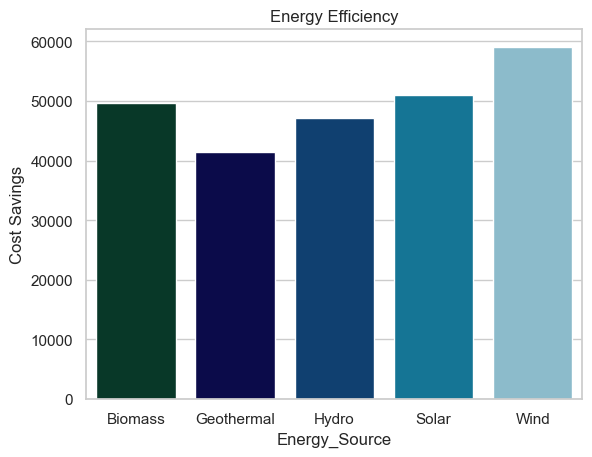

In [45]:
energy_efficiency = df.groupby("Energy_Source")['Cost_Savings_USD'].sum()
sns.barplot(x= energy_efficiency.index, y = energy_efficiency.values, palette="ocean")
plt.title("Energy Efficiency")
plt.ylabel("Cost Savings")
plt.show()

#  Identify extreme energy consumption cases

In [15]:
Q1 = np.percentile(df['Monthly_Usage_kWh'], 25)
Q3 = np.percentile(df['Monthly_Usage_kWh'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Monthly_Usage_kWh'] < lower_bound) | (df['Monthly_Usage_kWh'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers)

Q1: 402.73, Q3: 1117.7475, IQR: 715.0174999999999
Lower Bound: -669.7962499999999, Upper Bound: 2190.27375
Outliers:
Empty DataFrame
Columns: [Household_ID, Region, Country, Energy_Source, Monthly_Usage_kWh, Year, Household_Size, Income_Level, Urban_Rural, Adoption_Year, Subsidy_Received, Cost_Savings_USD]
Index: []


In [16]:
import geopandas as gpd

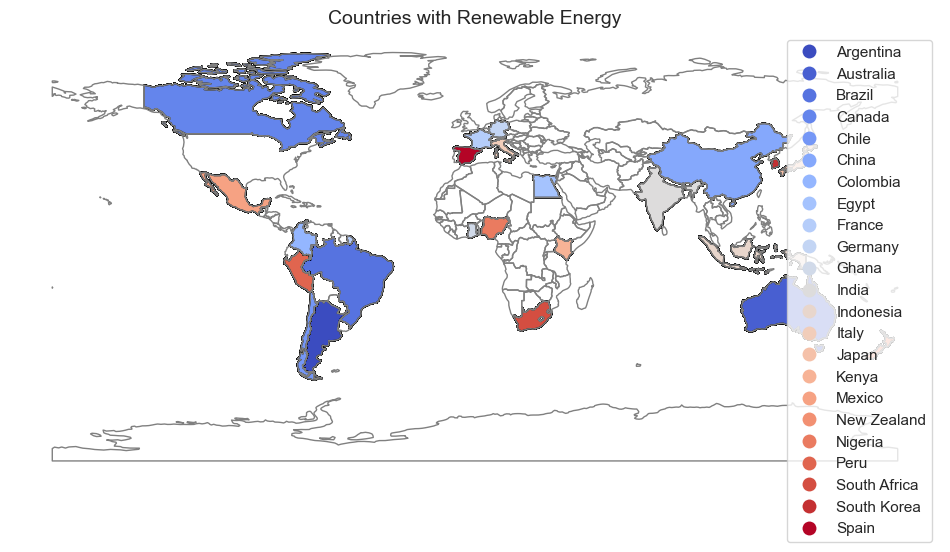

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df1 = df[['Country']]
merged = world.merge(df1, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1, color='gray')  
merged.plot(column='Country', cmap='coolwarm', ax=ax, legend=True, edgecolor='black')  # Highlight selected countries

ax.set_title('Countries with Renewable Energy', fontsize=14)
ax.axis('off')  

plt.show()

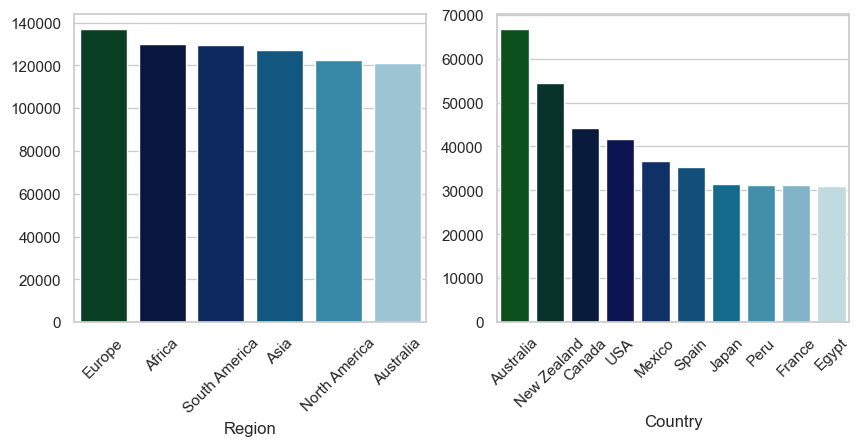

In [33]:
high_energy_consumption_reg = df.groupby('Region')['Monthly_Usage_kWh'].sum()
high_energy_consumption_reg = high_energy_consumption_reg.sort_values(ascending=False).head(10)

high_energy_consumption = df.groupby('Country')['Monthly_Usage_kWh'].sum()
high_energy_consumption = high_energy_consumption.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=high_energy_consumption_reg.index, y=high_energy_consumption_reg.values, palette='ocean')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x=high_energy_consumption.index, y=high_energy_consumption.values, palette='ocean')
plt.xticks(rotation=45)
plt.show()

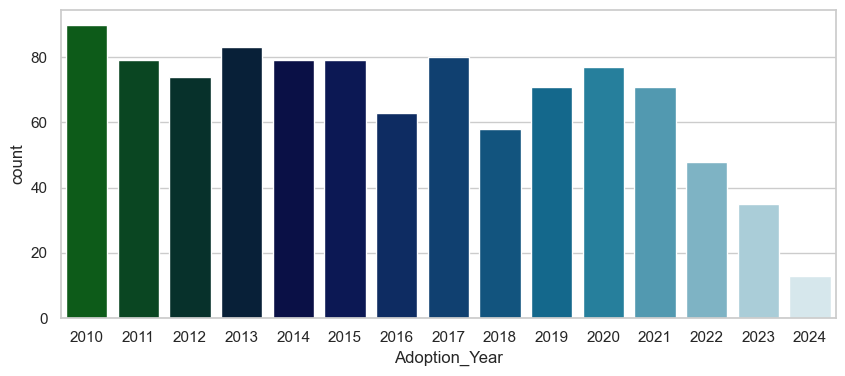

In [44]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['Adoption_Year'], palette='ocean')
plt.show()